<a href="https://colab.research.google.com/github/Sowmya-2348562/Quantum-Computing/blob/main/2348562_QC_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of Teleportation protocol

In [3]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 9.9 MB/s eta 0:00:00


In [5]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 85.5 MB/s eta 0:00:00


In [6]:
# Required imports

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

In [7]:
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

display(protocol.draw())

░      ┌───┐ ░    ┌─┐ ░                                     »
  Q: ───────────░───■──┤ H ├─░────┤M├─░─────────────────────────────────────»
     ┌───┐      ░ ┌─┴─┐└───┘ ░ ┌─┐└╥┘ ░                                     »
  A: ┤ H ├──■───░─┤ X ├──────░─┤M├─╫──░─────────────────────────────────────»
     └───┘┌─┴─┐ ░ └───┘      ░ └╥┘ ║  ░ ┌────── ┌───┐ ───────┐ ┌────── ┌───┐»
  B: ─────┤ X ├─░────────────░──╫──╫──░─┤ If-0  ┤ X ├  End-0 ├─┤ If-0  ┤ Z ├»
          └───┘ ░            ░  ║  ║  ░ └──╥─── └───┘ ───────┘ └──╥─── └───┘»
                                ║  ║    ┌──╨──┐                   ║         »
a: 1/═══════════════════════════╩══╬════╡ 0x1 ╞═══════════════════╬═════════»
                                0  ║    └─────┘                ┌──╨──┐      »
b: 1/══════════════════════════════╩═══════════════════════════╡ 0x1 ╞══════»
                                   0                           └─────┘      »
«               
«  Q: ──────────
«               
«  A: ──────────
«      ───────┐ 
«  B:   End-0 ├─
«      ───────┘ 
«a: 1/══════════
«               
«b: 1/══════════
«

In [8]:
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi,
)

display(random_gate.to_matrix())

array([[-0.33436362+0.j        , -0.08810718+0.93831663j],
       [-0.80567244+0.48897126j, -0.14599663-0.30080561j]])

In [9]:
# Create a new circuit including the same bits and qubits used in the
# teleportation protocol.

test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Start with the randomly selected gate on Q

test.append(random_gate, qubit)
test.barrier()

# Append the entire teleportation protocol from above.

test = test.compose(protocol)
test.barrier()

# Finally, apply the inverse of the random unitary to B and measure.

test.append(random_gate.inverse(), ebit1)

result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)

display(test.draw())

┌────────────────────────┐ ░            ░      ┌───┐ ░    ┌─┐ ░ »
       Q: ┤ U(3.8235,2.5961,4.806) ├─░────────────░───■──┤ H ├─░────┤M├─░─»
          └────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ ┌─┐└╥┘ ░ »
       A: ───────────────────────────░─┤ H ├──■───░─┤ X ├──────░─┤M├─╫──░─»
                                     ░ └───┘┌─┴─┐ ░ └───┘      ░ └╥┘ ║  ░ »
       B: ───────────────────────────░──────┤ X ├─░────────────░──╫──╫──░─»
                                     ░      └───┘ ░            ░  ║  ║  ░ »
     a: 1/════════════════════════════════════════════════════════╩══╬════»
                                                                  0  ║    »
     b: 1/═══════════════════════════════════════════════════════════╩════»
                                                                     0    »
Result: 1/════════════════════════════════════════════════════════════════»
                                                                          »
«                                                         ░ »
«       Q: ───────────────────────────────────────────────░─»
«                                                         ░ »
«       A: ───────────────────────────────────────────────░─»
«          ┌────── ┌───┐ ───────┐ ┌────── ┌───┐ ───────┐  ░ »
«       B: ┤ If-0  ┤ X ├  End-0 ├─┤ If-0  ┤ Z ├  End-0 ├──░─»
«          └──╥─── └───┘ ───────┘ └──╥─── └───┘ ───────┘  ░ »
«          ┌──╨──┐                   ║                      »
«     a: 1/╡ 0x1 ╞═══════════════════╬══════════════════════»
«          └─────┘                ┌──╨──┐                   »
«     b: 1/═══════════════════════╡ 0x1 ╞═══════════════════»
«                                 └─────┘                   »
«Result: 1/═════════════════════════════════════════════════»
«                                                           »
«                                          
«       Q: ────────────────────────────────
«                                          
«       A: ────────────────────────────────
«          ┌───────────────────────────┐┌─┐
«       B: ┤ U(-3.8235,-4.806,-2.5961) ├┤M├
«          └───────────────────────────┘└╥┘
«     a: 1/══════════════════════════════╬═
«                                        ║ 
«     b: 1/══════════════════════════════╬═
«                                        ║ 
«Result: 1/══════════════════════════════╩═
«                                        0

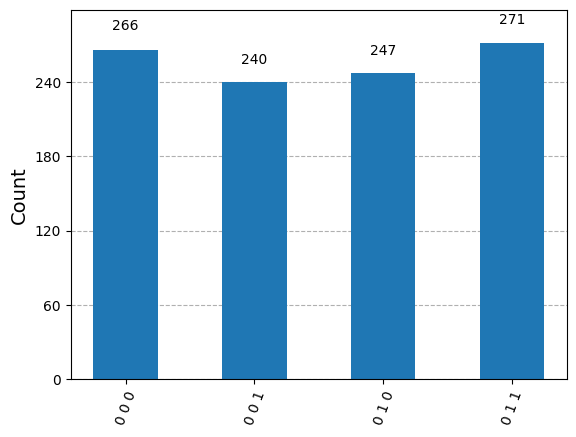

In [10]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

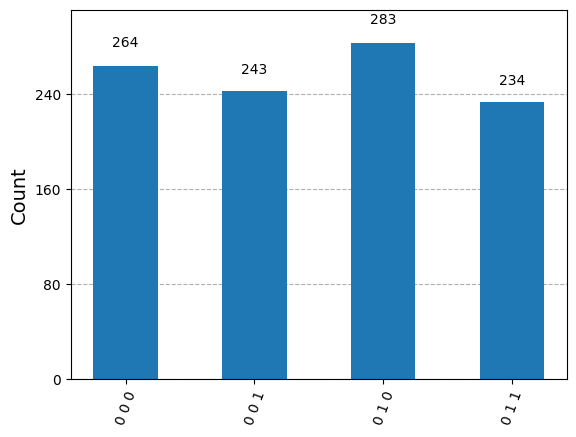

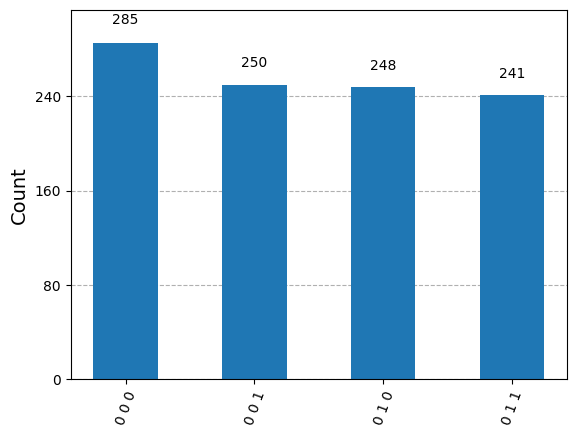

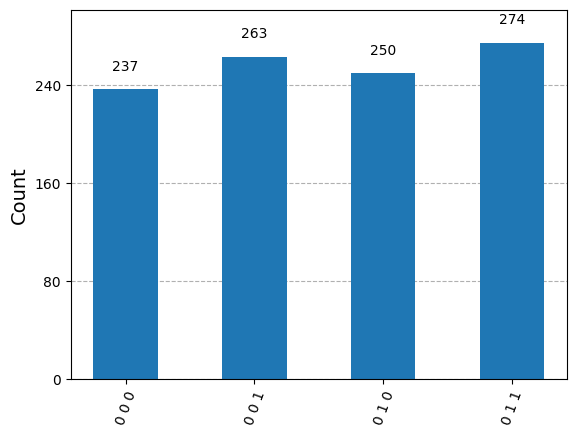

In [13]:
from qiskit.circuit.library import HGate, XGate

# Test with different states by changing `random_gate`
state_gates = [UGate(0, 0, 0), XGate(), HGate()]  # |0⟩, |1⟩, and |+⟩

for gate in state_gates:
    test = QuantumCircuit(qubit, ebit0, ebit1, a, b)
    test.append(gate, qubit)
    test.barrier()
    test = test.compose(protocol)
    test.barrier()
    test.append(gate.inverse(), ebit1)

    result = ClassicalRegister(1, "Result")
    test.add_register(result)
    test.measure(ebit1, result)

    result = AerSimulator().run(test).result()
    statistics = result.get_counts()
    display(plot_histogram(statistics))


After teleportation, Bob (holding qubit B) applies the inverse of the random or predefined unitary gate that was originally applied to qubit Q.
If teleportation is successful, Bob’s qubit B should now match the original state of qubit Q before it was teleported. This is tested by measuring B.
A measurement result of 0 in the Result register confirms that qubit B has returned to the initial state, indicating successful teleportation.
Statistical Validation:

By running the circuit multiple times (typically, you’d set a high number of shots), you can gather a measurement distribution in the histogram. For successful teleportation, you should predominantly see counts for the 0 state in the Result register.
If the circuit repeatedly produces the 0 state after the inverse gate, it verifies that the state of Q has been faithfully transferred to B through the teleportation protocol.
Interpreting the Histogram Output
A histogram with most of the counts concentrated at 0 in the Result register confirms successful teleportation.
If you observe other counts (such as 1), it may indicate issues in the teleportation setup, such as imperfect entanglement or measurement errors.